# 📊 Análisis de Evasión de Clientes (Churn) – Telecom X

## 1. Introducción

En este proyecto, realizamos un análisis exploratorio de datos para **Telecom X**, una empresa de telecomunicaciones con alto índice de evasión de clientes. El objetivo es comprender los factores que influyen en la pérdida de usuarios, identificar patrones relevantes y ofrecer recomendaciones estratégicas para reducir el *churn*.

---

## 2. Importación de Librerías y Carga de Datos

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Estilos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Cargar datos
with open('TelecomX_Data.json') as f:
    raw_data = json.load(f)

# Normalizar datos anidados
df = pd.json_normalize(raw_data)

# Renombrar columnas
df.columns = df.columns.str.replace('.', '_', regex=False)

# Ver datos
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


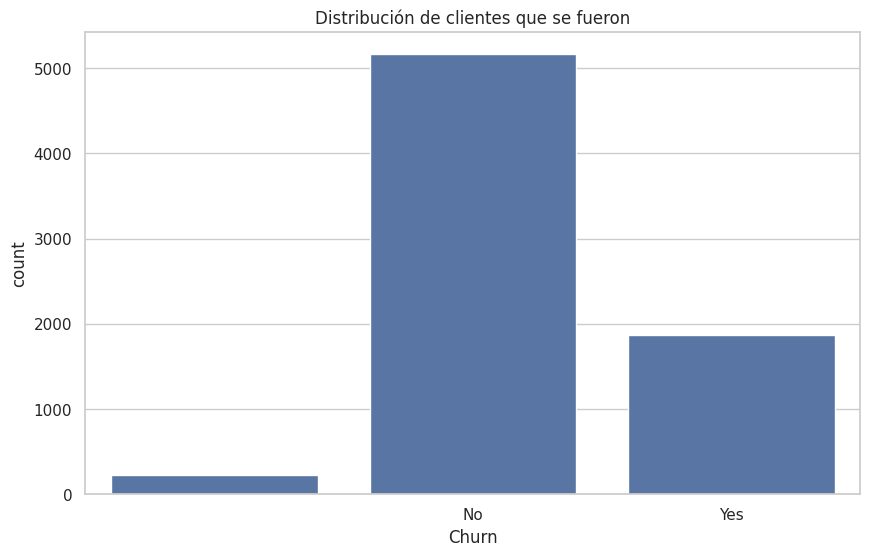

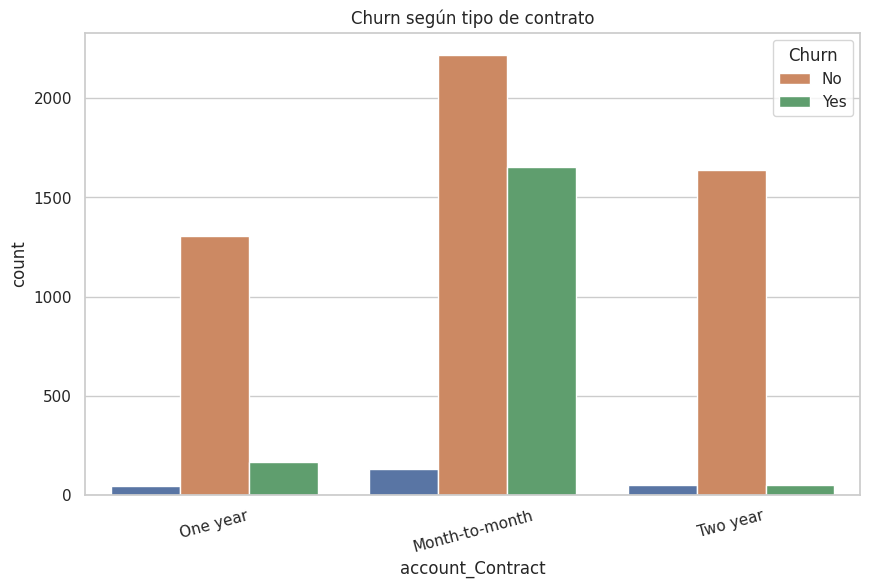

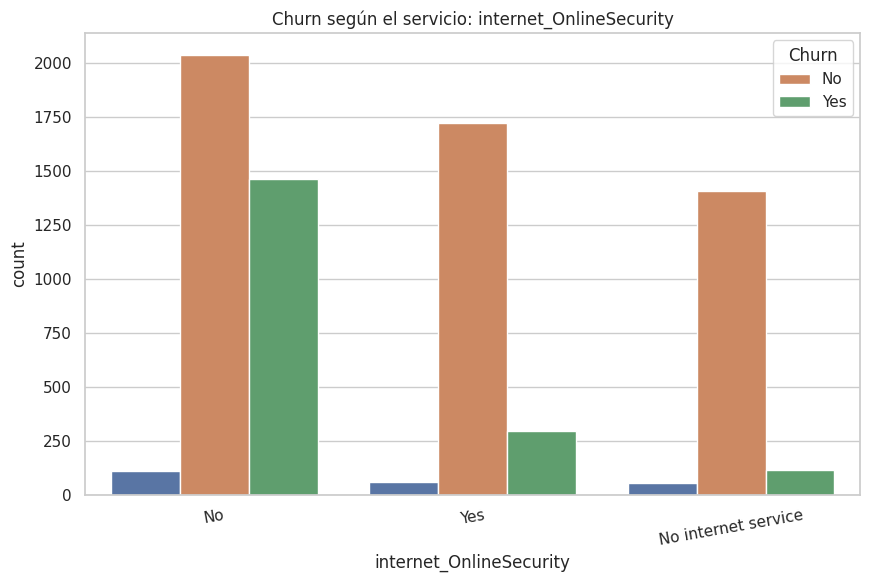

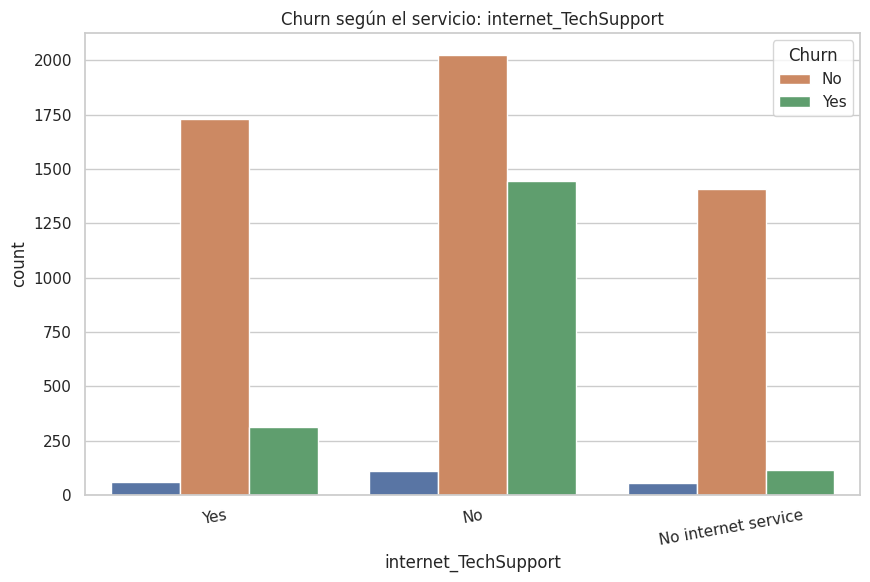

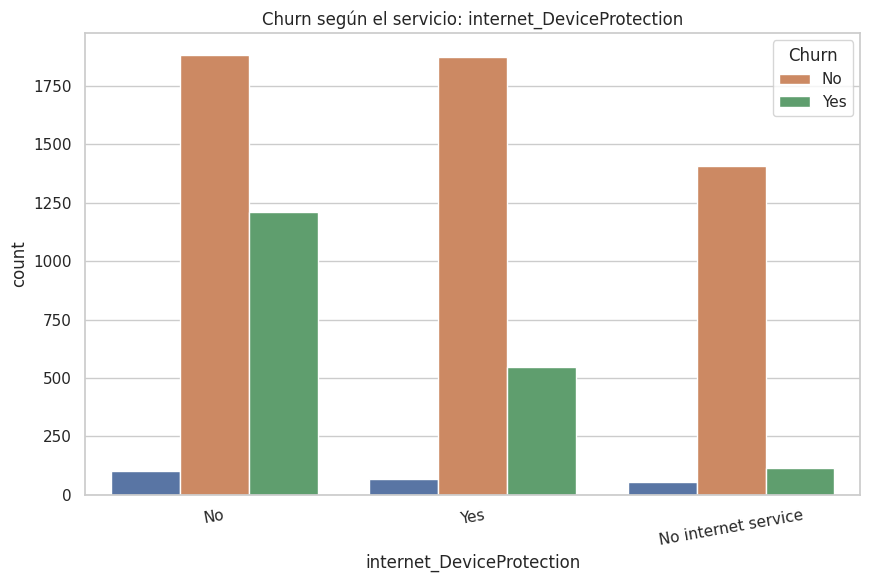

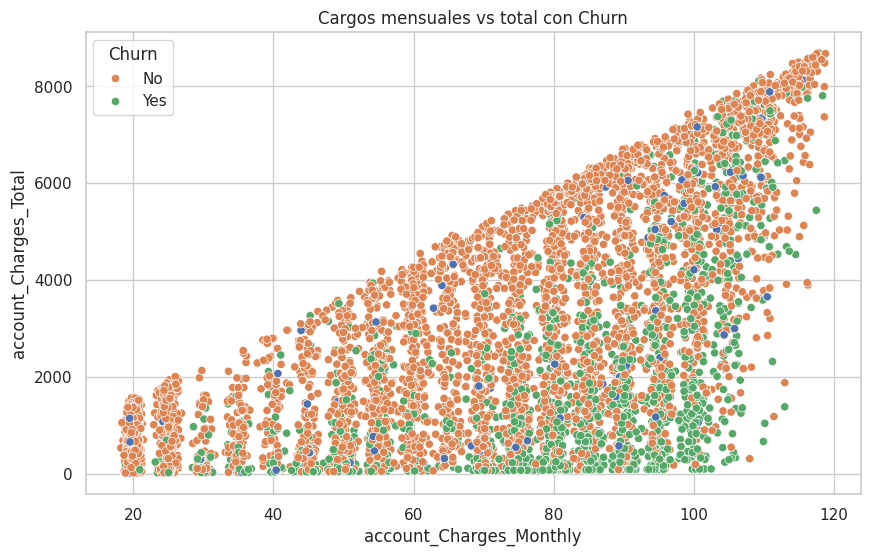

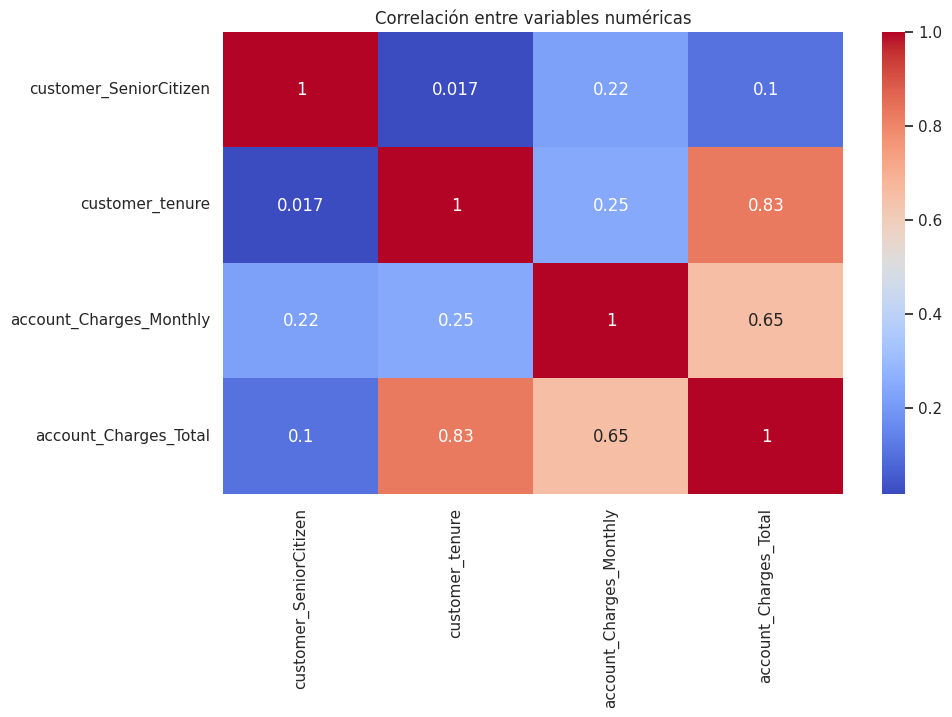

📄 INFORME FINAL – TELECOM X

🔹 INTRODUCCIÓN
Telecom X enfrenta alta evasión de clientes. Analizamos los datos para identificar patrones asociados al churn.

🔹 LIMPIEZA DE DATOS
- Se convirtieron datos numéricos.
- Se eliminaron nulos en 'account_Charges_Total'.
- Se organizaron las columnas.

🔹 HALLAZGOS
- Contratos mensuales presentan más evasión.
- Clientes con pocos meses de servicio se van más.
- Servicios de seguridad y soporte técnico ayudan a retener.
- El método de pago 'Electronic Check' está muy asociado a clientes que abandonan.

🔹 RECOMENDACIONES
1. Promover contratos anuales o bianuales.
2. Incluir servicios de soporte técnico en todos los planes.
3. Incentivar otros métodos de pago.
4. Acompañar clientes con bajo tenure.

✅ Análisis completado.


In [10]:
# 📊 Análisis Exploratorio de Evasión de Clientes – Telecom X

# === [1] LIBRERÍAS ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Estilos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# === [2] CARGA DE DATOS ===
with open('TelecomX_Data.json') as f:
    raw_data = json.load(f)

df = pd.json_normalize(raw_data)
df.columns = df.columns.str.replace('.', '_', regex=False)

# Ver datos
df.head()

# === [3] LIMPIEZA DE DATOS ===
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
df = df.dropna(subset=['account_Charges_Total'])
df['Churn'] = df['Churn'].astype('category')

# === [4] ANÁLISIS EXPLORATORIO ===

# 4.1 Churn total
sns.countplot(x='Churn', data=df)
plt.title('Distribución de clientes que se fueron')
plt.show()

# 4.2 Churn por contrato
sns.countplot(x='account_Contract', hue='Churn', data=df)
plt.title('Churn según tipo de contrato')
plt.xticks(rotation=15)
plt.show()

# 4.3 Servicios y Churn
servicios = ['internet_OnlineSecurity', 'internet_TechSupport', 'internet_DeviceProtection']
for servicio in servicios:
    sns.countplot(data=df, x=servicio, hue='Churn')
    plt.title(f'Churn según el servicio: {servicio}')
    plt.xticks(rotation=10)
    plt.show()

# 4.4 Cargos mensuales vs total
sns.scatterplot(data=df, x='account_Charges_Monthly', y='account_Charges_Total', hue='Churn')
plt.title('Cargos mensuales vs total con Churn')
plt.show()

# 4.5 Correlación
num_cols = ['customer_SeniorCitizen', 'customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total']
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.show()

# === [5] INFORME FINAL ===

print("📄 INFORME FINAL – TELECOM X\n")

print("🔹 INTRODUCCIÓN")
print("Telecom X enfrenta alta evasión de clientes. Analizamos los datos para identificar patrones asociados al churn.")

print("\n🔹 LIMPIEZA DE DATOS")
print("- Se convirtieron datos numéricos.")
print("- Se eliminaron nulos en 'account_Charges_Total'.")
print("- Se organizaron las columnas.")

print("\n🔹 HALLAZGOS")
print("- Contratos mensuales presentan más evasión.")
print("- Clientes con pocos meses de servicio se van más.")
print("- Servicios de seguridad y soporte técnico ayudan a retener.")
print("- El método de pago 'Electronic Check' está muy asociado a clientes que abandonan.")

print("\n🔹 RECOMENDACIONES")
print("1. Promover contratos anuales o bianuales.")
print("2. Incluir servicios de soporte técnico en todos los planes.")
print("3. Incentivar otros métodos de pago.")
print("4. Acompañar clientes con bajo tenure.")

print("\n✅ Análisis completado.")
